In [1]:
#import libraries
import numpy as np
import pprint
import scipy
import scipy.linalg
import pandas as pd
import random
from collections import OrderedDict
from scipy.linalg import svd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json
from tqdm import tqdm
from collections import defaultdict
from surprise import Reader, Dataset, accuracy
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline
from surprise.model_selection import train_test_split
np.set_printoptions(threshold=20)
pd.options.mode.copy_on_write = True

from ipynb.fs.full.SVD_FUNCTIONS import csv_to_df
from ipynb.fs.full.SVD_FUNCTIONS import Convert_to_Matrix
from ipynb.fs.full.SVD_FUNCTIONS import LU_Factorization
from ipynb.fs.full.SVD_FUNCTIONS import find_similar
from ipynb.fs.full.SVD_FUNCTIONS import get_most_frequent_users
from ipynb.fs.full.SVD_FUNCTIONS import get_users_with_minimal_ratings
from ipynb.fs.full.SVD_FUNCTIONS import get_training_data
from ipynb.fs.full.SVD_FUNCTIONS import pivot_rating_to_user_frame
from ipynb.fs.full.SVD_FUNCTIONS import do_svd
from ipynb.fs.full.SVD_FUNCTIONS import plot_data

from ipynb.fs.full.SVD_FUNCTIONS import recommend
from ipynb.fs.full.SVD_FUNCTIONS import get_tier_list
from ipynb.fs.full.SVD_FUNCTIONS import get_individual_user_data
from ipynb.fs.full.SVD_FUNCTIONS import print_user_data


In [2]:
books_ratings_cleaned, book_dict = csv_to_df("Books_rating.csv", "books_data.csv")

In [3]:
books_ratings_cleaned.count()

Id              2438213
User_id         2438213
review/score    2438213
dtype: int64

In [4]:
books_ratings_cleaned.head()

,Id,User_id,review/score
0,1882931173,AVCGYZL8FQQTD,4.0
1,0826414346,A30TK6U7DNS82R,5.0
2,0826414346,A3UH4UZ4RSVO82,5.0
3,0826414346,A2MVUWT453QH61,4.0
4,0826414346,A22X4XUPKF66MR,4.0


In [13]:
columns_titles = ["User_id","Id", "review/score"]

user_book_data = books_ratings_cleaned

user_book_data_svd = books_ratings_cleaned

user_book_data_reindex = user_book_data.reindex(columns=columns_titles)

user_book_data_reindex.head()

,User_id,Id,review/score
0,AVCGYZL8FQQTD,1882931173,4.0
1,A30TK6U7DNS82R,0826414346,5.0
2,A3UH4UZ4RSVO82,0826414346,5.0
3,A2MVUWT453QH61,0826414346,4.0
4,A22X4XUPKF66MR,0826414346,4.0


In [14]:
len(user_book_data_reindex['Id'].unique())

216023

In [15]:
len(user_book_data_reindex['User_id'].unique())

1008972

In [16]:
#EXCUTE ME PLEASE FOR REAL IM DYING
#LIKE REALLY, RUN ME
training_data, test_data = get_training_data(.99, user_book_data_svd)

100%|███████████████████████████████████████████████████████████████████████████| 5340/5340 [00:00<00:00, 11201.97it/s]


In [11]:
A = training_data.fillna(0)
B = test_data.fillna(0)
A.shape

(1044, 13164)

In [12]:
A.head(20)

,B000JJVHZE,B000B6ICYO,B000MV8HLQ,0671787004,B0006AV23S,B0007FGOEO,0891908013,0671641050,B000KK2SLE,0910034265,...,0744002397,1574883283,B000LF1MBU,0972915052,1564774147,1892495007,0963865005,1404800700,0854491635,0801499240
A1T17LMQABMBN5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1MC6BFHWY6WC3,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A3UDYY6L2NH3JS,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1RLYOPK16YXC1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1BGE3EXIJ42XA,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGKPTMTR3UX1R,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A20VXF9DYI0I6H,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A18IK6YI6T3RK2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A3FJOQ23K5PQB8,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A3FVAWZNKW9GX,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
column_names = list(A.columns)
row_names = list(A.transpose().columns)

user = 10

In [13]:
new_A= A.to_numpy()
# change the dtype to 'float64' 

U, Vt = do_svd(new_A,50)


In [14]:
user_tiers = get_tier_list(column_names, row_names, user, Vt, book_dict)
user_individual_data, refined_user_list, get_user_scores, get_user_review_list = get_individual_user_data(column_names, row_names, A, user, book_dict)

User AHXAPVSHPJ6OJ recommendations:
1556909330 ['Dune', 1522]
B000NWU3I4 ['The Hobbitt, or there and back again; illustrated by the author.', 4420]
B00005VOED ['A confederacy of dunces', 1292]
B000NDSX6C ['The Hobbit', 4426]
B000HEGYW2 ['East of Eden', 653]


In [15]:
print_user_data(user, refined_user_list, get_user_review_list, get_user_scores, row_names)

User AHXAPVSHPJ6OJ book reviews with score:

B0006BSSPM ['Sister Carrie (The Dollar library of American fiction)', 166] 5.0
B000CSYUNS ['A Death in the Family', 100] 5.0
1844560333 ['Pride and Prejudice', 2041] 4.0
0613025164 ['Henry IV, Part 2 (The New Folger Library Shakespeare)', 33] 4.0
B000GRSR4S ["Slaughterhouse-Five : Or the Children's Crusade", 1000] 5.0
0333168925 ['Life and Death of the Mayor of Casterbridge (New Wessex editions)', 142] 5.0
1901768619 ['Emma', 485] 4.0
B0007E8PCY ['The third galaxy reader', 119] 5.0
0582418224 ['The Moonstone (Penguin Readers, Level 6)', 188] 4.0
B0009YB0U6 ['Sons and Lovers', 111] 5.0
0435126024 ['Jane Eyre (New Windmill)', 1523] 5.0
0816156921 ['Dracula (G. K. Hall (Large Print))', 1129] 4.0
B000I3JBUO ['One Hundred Years of Solitude', 907] 5.0
0582528259 ['Jane Eyre (Simple English)', 1523] 5.0
B000NOWYR0 ['Tender Is the Night', 196] 5.0
B000PGLOWW ['In Cold Blood: A True Account of a Multiple Murder and Its Consequences', 661] 5.0
B000N4P

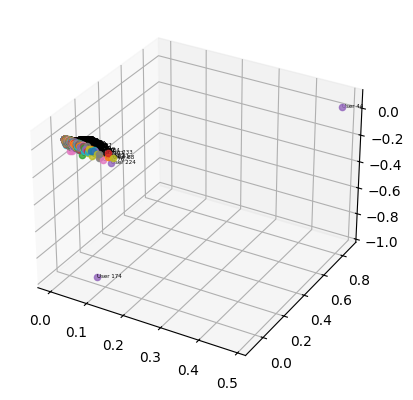

In [16]:
plot_data(U, "User")

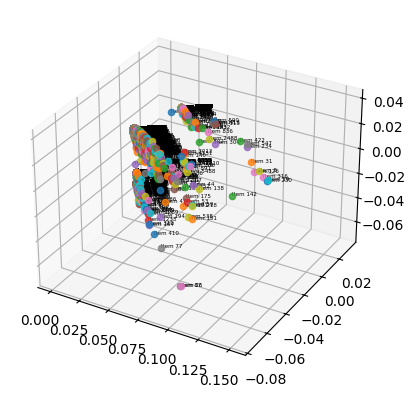

In [17]:
plot_data(Vt.transpose(), "Item")

In [17]:
book_dict

{'1882931173': ['Its Only Art If Its Well Hung!', 1],
 '0826414346': ['Dr. Seuss: American Icon', 9],
 '0829814000': ['Wonderful Worship in Smaller Churches', 4],
 '0595344550': ['Whispers of the Wicked Saints', 32],
 '0253338352': ['Nation Dance: Religion, Identity and Cultural Difference in the Caribbean',
  1],
 '0802841899': ['The Church of Christ: A Biblical Ecclesiology for Today', 4],
 'B0007FIF28': ['The Overbury affair (Avon)', 1],
 'B000JINSBG': ['A Walk in the Woods: a Play in Two Acts', 3],
 '0895554224': ['Saint Hyacinth of Poland', 2],
 '0963923080': ["Rising Sons and Daughters: Life Among Japan's New Young", 3],
 '0854968350': ["Muslim Women's Choices: Religious Belief and Social Reality (Cross Cultural Perspectives on Women)",
  2],
 '0918973031': ['Dramatica for Screenwriters', 10],
 '1858683092': ['Mensa Number Puzzles (Mensa Word Games for Kids)', 2],
 '0792391810': ['Vector Quantization and Signal Compression (The Springer International Series in Engineering and Com